# Very draft piece of work, more in depth analysis to follow. 

In [6]:
# ipython notebook
# anaconda python 3.5

In [56]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [57]:

# Ecuador
quito = pd.read_csv('./data/uio_clean.csv', encoding='utf-8')

# remove useless columns
quito.drop(['id', 'store_and_fwd_flag'], axis = 1, inplace=True)

quito.head()

vendor_id      pickup_datetime     dropoff_datetime  pickup_longitude  \
0     Quito  2016-09-17 09:32:06  2016-09-17 10:05:51        -78.503922   
1     Quito  2016-09-18 04:03:20  2016-09-18 04:26:30        -78.440306   
2     Quito  2016-09-16 06:29:36  2016-09-18 06:41:33        -78.469551   
3     Quito  2016-09-18 05:57:47  2016-09-18 06:30:00        -78.558076   
4     Quito  2016-09-18 07:58:42  2016-09-18 08:14:29        -78.521818   

   pickup_latitude  dropoff_longitude  dropoff_latitude  trip_duration  \
0        -0.232824         -78.549447         -0.361363           2025   
1         0.006789         -78.490786         -0.104836           1390   
2        -0.143636         -78.470277         -0.131083         130317   
3        -0.278241         -78.430220         -0.201934           1933   
4        -0.208480         -78.504558         -0.222462            948   

   dist_meters  wait_sec  
0        24228       346  
1        16680       456  
2         1987       290  
3        25146       302  
4         4625       314

In [58]:
quito['pickup_datetime'] = pd.to_datetime(quito.pickup_datetime)
quito['dropoff_datetime'] = pd.to_datetime(quito.dropoff_datetime)


quito['Day'] = quito['pickup_datetime'].dt.weekday_name
quito['Year'] = quito['pickup_datetime'].dt.year
quito['Month'] = quito['pickup_datetime'].dt.month

quito.set_index('pickup_datetime', inplace = True)

quito

vendor_id    dropoff_datetime  pickup_longitude  \
pickup_datetime                                                       
2016-09-17 09:32:06     Quito 2016-09-17 10:05:51        -78.503922   
2016-09-18 04:03:20     Quito 2016-09-18 04:26:30        -78.440306   
2016-09-16 06:29:36     Quito 2016-09-18 06:41:33        -78.469551   
2016-09-18 05:57:47     Quito 2016-09-18 06:30:00        -78.558076   
2016-09-18 07:58:42     Quito 2016-09-18 08:14:29        -78.521818   
2016-08-27 04:19:02     Quito 2016-08-27 04:44:12        -78.509202   
2016-09-18 10:08:57     Quito 2016-09-18 10:31:18        -78.481542   
2016-09-18 11:06:58     Quito 2016-09-18 11:53:59        -78.529780   
2016-09-18 11:54:04     Quito 2016-09-18 12:12:23        -78.361079   
2016-09-18 12:21:16     Quito 2016-09-18 12:23:05        -78.497122   
2016-09-18 12:23:20     Quito 2016-09-18 12:31:34        -78.499770   
2016-09-17 04:15:09     Quito 2016-09-18 12:28:12        -78.511022   
2016-09-18 01:01:53     Quito 2016-09-18 01:35:58        -78.465369   
2016-09-18 01:14:07     Quito 2016-09-18 01:38:05        -78.484125   
2016-09-18 01:36:07     Quito 2016-09-18 02:14:11        -78.492840   
2016-09-18 02:34:21     Quito 2016-09-18 02:38:29        -78.546344   
2016-09-18 04:06:27     Quito 2016-09-18 04:38:32        -78.481585   
2016-09-18 04:20:13     Quito 2016-09-18 04:50:58        -78.418590   
2016-09-18 06:23:17     Quito 2016-09-18 06:28:02        -78.548782   
2016-09-18 06:31:24     Quito 2016-09-18 06:35:34        -78.543443   
2016-09-18 06:37:29     Quito 2016-09-18 06:40:20        -78.552693   
2016-09-18 07:09:08     Quito 2016-09-18 07:14:57        -78.550952   
2016-09-18 07:18:53     Quito 2016-09-18 07:26:53        -78.518801   
2016-09-18 07:27:12     Quito 2016-09-18 07:55:44        -78.506479   
2016-09-18 07:59:59     Quito 2016-09-18 08:12:49        -78.543215   
2016-09-18 08:55:16     Quito 2016-09-18 08:55:52        -78.527385   
2016-09-18 09:35:01     Quito 2016-09-18 09:43:45        -78.471293   
2016-09-18 09:45:29     Quito 2016-09-18 10:01:10        -78.460745   
2016-09-18 10:11:20     Quito 2016-09-18 10:12:03        -78.497553   
2016-09-18 11:45:54     Quito 2016-09-19 12:04:24        -78.445781   
...                       ...                 ...               ...   
2016-10-27 03:37:20     Quito 2016-10-27 03:38:09        -78.439213   
2016-10-27 03:43:44     Quito 2016-10-27 03:59:02        -78.499908   
2016-10-27 03:55:34     Quito 2016-10-27 04:03:04        -78.466038   
2016-10-27 03:49:43     Quito 2016-10-27 04:03:49        -78.504971   
2016-10-27 03:51:18     Quito 2016-10-27 04:08:24        -78.475387   
2016-10-27 03:11:14     Quito 2016-10-27 04:20:52        -78.506878   
2016-10-27 05:01:25     Quito 2016-10-27 05:13:52        -78.504940   
2016-10-27 05:01:13     Quito 2016-10-27 05:31:31        -78.484611   
2016-10-27 05:40:51     Quito 2016-10-27 05:47:44        -78.545518   
2016-10-27 05:51:24     Quito 2016-10-27 05:56:11        -78.552815   
2016-10-27 06:12:39     Quito 2016-10-27 06:15:39        -78.530951   
2016-10-27 06:15:45     Quito 2016-10-27 06:23:41        -78.526596   
2016-10-27 06:14:14     Quito 2016-10-27 06:25:34        -78.504771   
2016-10-27 06:29:36     Quito 2016-10-27 06:37:05        -78.522157   
2016-10-27 06:37:08     Quito 2016-10-27 06:53:02        -78.509235   
2016-10-26 09:00:48     Quito 2016-10-27 07:05:14        -78.462017   
2016-10-27 06:53:10     Quito 2016-10-27 07:06:30        -78.491899   
2016-10-27 06:30:05     Quito 2016-10-27 07:21:47        -78.473292   
2016-10-27 07:07:06     Quito 2016-10-27 07:28:08        -78.485572   
2016-10-27 07:16:13     Quito 2016-10-27 07:43:12        -78.479990   
2016-10-27 07:44:16     Quito 2016-10-27 07:57:23        -78.478655   
2016-10-27 08:01:49     Quito 2016-10-27 08:08:03        -78.486512   
2016-10-27 07:32:29     Quito 2016-10-27 08:26:11        -78.534627   
2016-10-27 08:13:06     Quito 2016-10-27 08:

In [10]:
import sys
from sklearn.cluster import KMeans
from scipy.spatial import Voronoi, voronoi_plot_2d

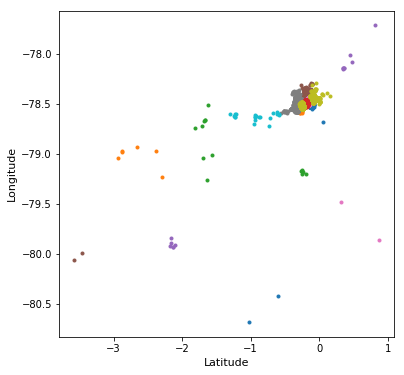

In [12]:
pickup_X = quito[['pickup_latitude', 'pickup_longitude']]
dropoff_X = quito[['dropoff_latitude', 'dropoff_longitude']]

id_n=20
pickup_kmeans = KMeans(n_clusters=id_n, random_state=0).fit(pickup_X)
dropoff_kmeans = KMeans(n_clusters=id_n, random_state=0).fit(dropoff_X)

plt.figure(figsize=(6, 6))
plt.ylabel('Longitude', fontsize=11)
plt.xlabel('Latitude', fontsize=11)
id_label = dropoff_kmeans.labels_
# plt.xlim((19, 20))
# plt.ylim((-100, -98))

for i in range(id_n):
    cluster=np.where(id_label==i)[0]
    plt.plot(dropoff_X.dropoff_latitude[cluster].values, dropoff_X.dropoff_longitude[cluster].values, '.')

plt.show()

In [13]:
quito['pickup_region'] = pickup_kmeans.predict(pickup_X)
quito['dropoff_region'] = dropoff_kmeans.predict(dropoff_X)

quito

vendor_id    dropoff_datetime  pickup_longitude  \
pickup_datetime                                                       
2016-09-17 09:32:06     Quito 2016-09-17 10:05:51        -78.503922   
2016-09-18 04:03:20     Quito 2016-09-18 04:26:30        -78.440306   
2016-09-16 06:29:36     Quito 2016-09-18 06:41:33        -78.469551   
2016-09-18 05:57:47     Quito 2016-09-18 06:30:00        -78.558076   
2016-09-18 07:58:42     Quito 2016-09-18 08:14:29        -78.521818   
2016-08-27 04:19:02     Quito 2016-08-27 04:44:12        -78.509202   
2016-09-18 10:08:57     Quito 2016-09-18 10:31:18        -78.481542   
2016-09-18 11:06:58     Quito 2016-09-18 11:53:59        -78.529780   
2016-09-18 11:54:04     Quito 2016-09-18 12:12:23        -78.361079   
2016-09-18 12:21:16     Quito 2016-09-18 12:23:05        -78.497122   
2016-09-18 12:23:20     Quito 2016-09-18 12:31:34        -78.499770   
2016-09-17 04:15:09     Quito 2016-09-18 12:28:12        -78.511022   
2016-09-18 01:01:53     Quito 2016-09-18 01:35:58        -78.465369   
2016-09-18 01:14:07     Quito 2016-09-18 01:38:05        -78.484125   
2016-09-18 01:36:07     Quito 2016-09-18 02:14:11        -78.492840   
2016-09-18 02:34:21     Quito 2016-09-18 02:38:29        -78.546344   
2016-09-18 04:06:27     Quito 2016-09-18 04:38:32        -78.481585   
2016-09-18 04:20:13     Quito 2016-09-18 04:50:58        -78.418590   
2016-09-18 06:23:17     Quito 2016-09-18 06:28:02        -78.548782   
2016-09-18 06:31:24     Quito 2016-09-18 06:35:34        -78.543443   
2016-09-18 06:37:29     Quito 2016-09-18 06:40:20        -78.552693   
2016-09-18 07:09:08     Quito 2016-09-18 07:14:57        -78.550952   
2016-09-18 07:18:53     Quito 2016-09-18 07:26:53        -78.518801   
2016-09-18 07:27:12     Quito 2016-09-18 07:55:44        -78.506479   
2016-09-18 07:59:59     Quito 2016-09-18 08:12:49        -78.543215   
2016-09-18 08:55:16     Quito 2016-09-18 08:55:52        -78.527385   
2016-09-18 09:35:01     Quito 2016-09-18 09:43:45        -78.471293   
2016-09-18 09:45:29     Quito 2016-09-18 10:01:10        -78.460745   
2016-09-18 10:11:20     Quito 2016-09-18 10:12:03        -78.497553   
2016-09-18 11:45:54     Quito 2016-09-19 12:04:24        -78.445781   
...                       ...                 ...               ...   
2016-10-27 03:37:20     Quito 2016-10-27 03:38:09        -78.439213   
2016-10-27 03:43:44     Quito 2016-10-27 03:59:02        -78.499908   
2016-10-27 03:55:34     Quito 2016-10-27 04:03:04        -78.466038   
2016-10-27 03:49:43     Quito 2016-10-27 04:03:49        -78.504971   
2016-10-27 03:51:18     Quito 2016-10-27 04:08:24        -78.475387   
2016-10-27 03:11:14     Quito 2016-10-27 04:20:52        -78.506878   
2016-10-27 05:01:25     Quito 2016-10-27 05:13:52        -78.504940   
2016-10-27 05:01:13     Quito 2016-10-27 05:31:31        -78.484611   
2016-10-27 05:40:51     Quito 2016-10-27 05:47:44        -78.545518   
2016-10-27 05:51:24     Quito 2016-10-27 05:56:11        -78.552815   
2016-10-27 06:12:39     Quito 2016-10-27 06:15:39        -78.530951   
2016-10-27 06:15:45     Quito 2016-10-27 06:23:41        -78.526596   
2016-10-27 06:14:14     Quito 2016-10-27 06:25:34        -78.504771   
2016-10-27 06:29:36     Quito 2016-10-27 06:37:05        -78.522157   
2016-10-27 06:37:08     Quito 2016-10-27 06:53:02        -78.509235   
2016-10-26 09:00:48     Quito 2016-10-27 07:05:14        -78.462017   
2016-10-27 06:53:10     Quito 2016-10-27 07:06:30        -78.491899   
2016-10-27 06:30:05     Quito 2016-10-27 07:21:47        -78.473292   
2016-10-27 07:07:06     Quito 2016-10-27 07:28:08        -78.485572   
2016-10-27 07:16:13     Quito 2016-10-27 07:43:12        -78.479990   
2016-10-27 07:44:16     Quito 2016-10-27 07:57:23        -78.478655   
2016-10-27 08:01:49     Quito 2016-10-27 08:08:03        -78.486512   
2016-10-27 07:32:29     Quito 2016-10-27 08:26:11        -78.534627   
2016-10-27 08:13:06     Quito 2016-10-27 08:

<h1>Who is the most preferred vendor in the city?</h1>

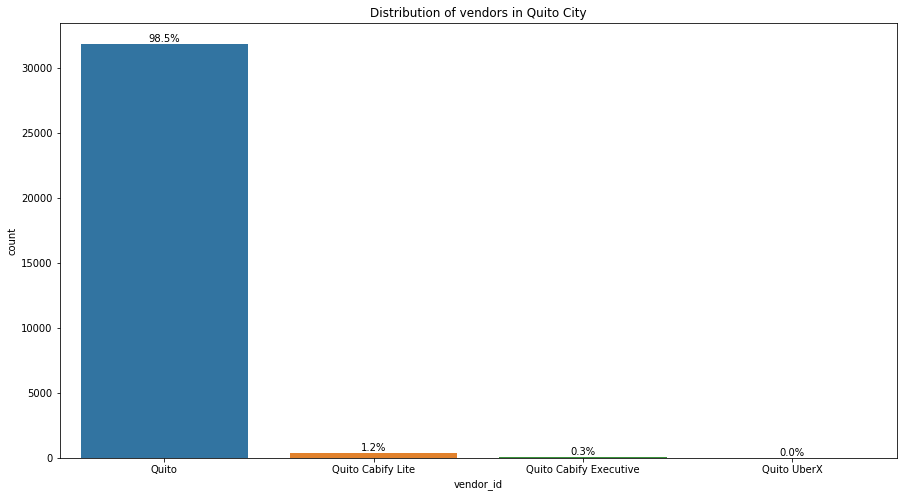

In [14]:
fig, ax = plt.subplots(figsize = (15, 8))
ax = sns.countplot(x = quito['vendor_id'], data = quito)

ncount = len(quito)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.* y / ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
ax.set_title('Distribution of vendors in Quito City');

<h1>Which days the vendors wait more?</h1>

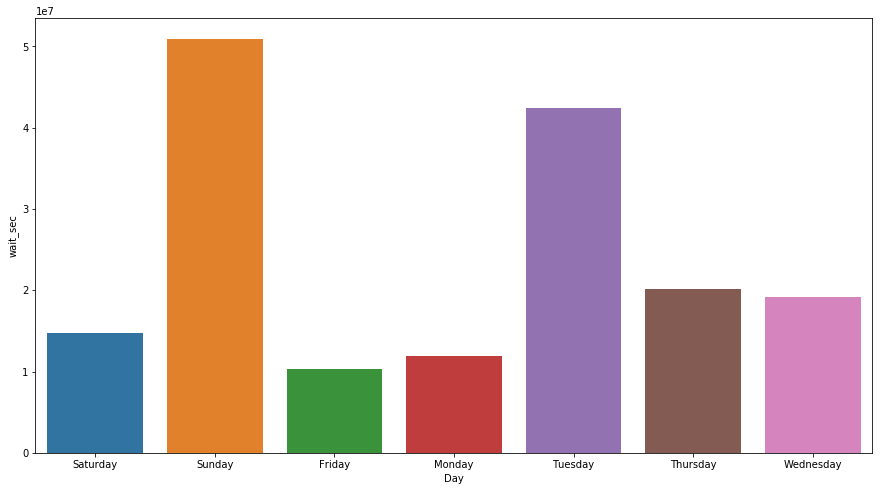

In [15]:
fig, ax = plt.subplots(figsize = (15, 8))
ax = sns.barplot(x = 'Day', y = 'wait_sec', data = quito, ci = False);

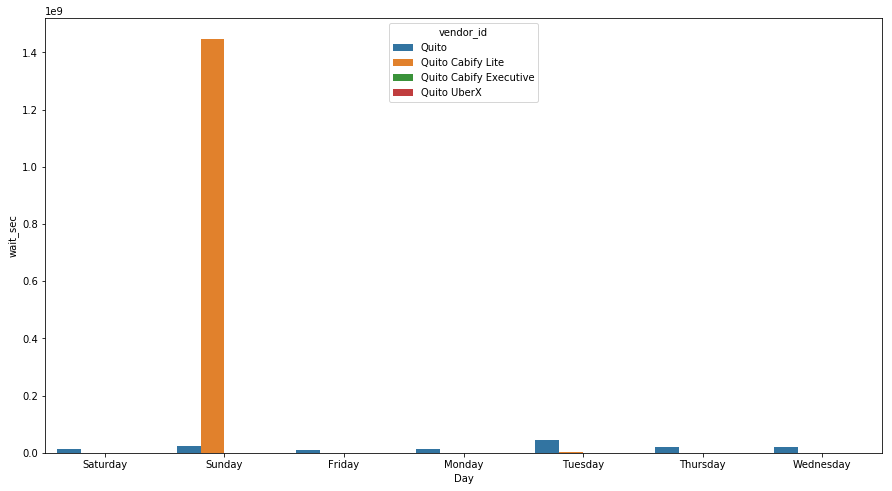

In [16]:
fig, ax = plt.subplots(figsize = (15, 8))
ax = sns.barplot(x='Day', y='wait_sec', hue='vendor_id', data=quito, ci=None);

# Which days and with which vendors people do long trips?

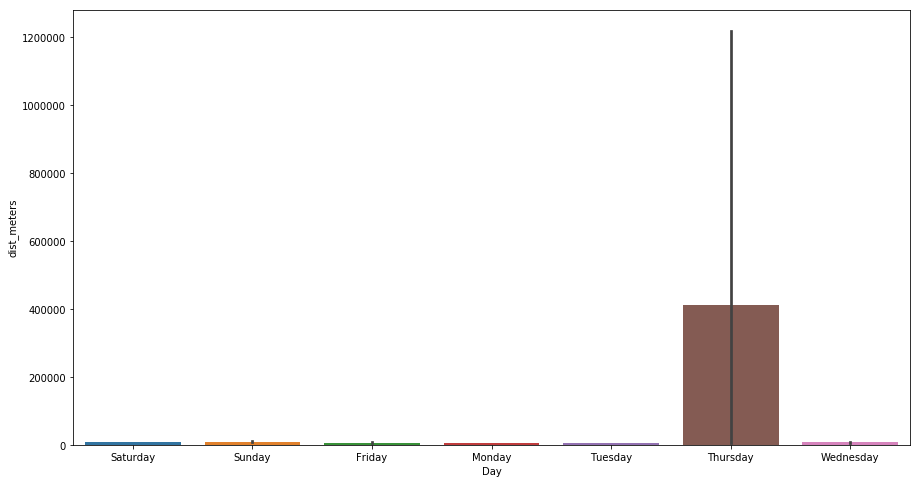

In [17]:
fig, ax = plt.subplots(figsize=(15, 8))
ax = sns.barplot(x='Day', y='dist_meters', data=quito);

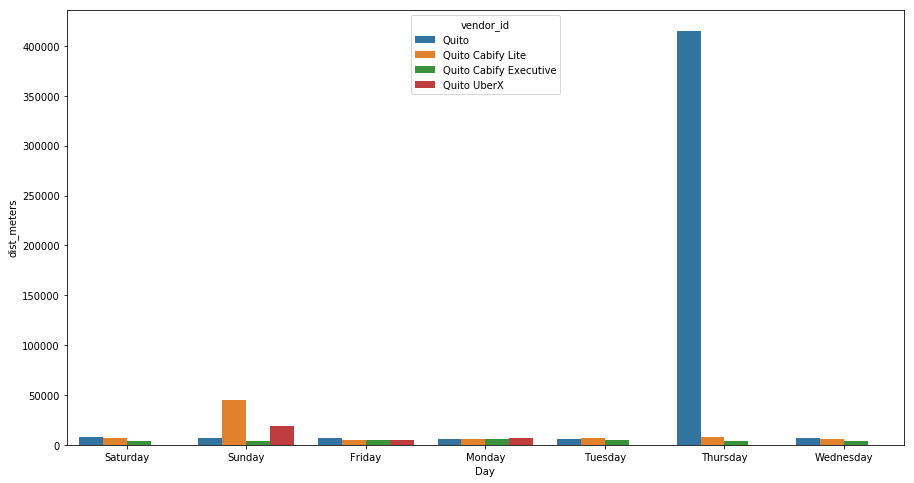

In [18]:
fig, ax = plt.subplots(figsize=(15, 8))
ax = sns.barplot(x='Day', y='dist_meters', hue='vendor_id', data=quito, ci=None);

# How the distance travelled changes by time?

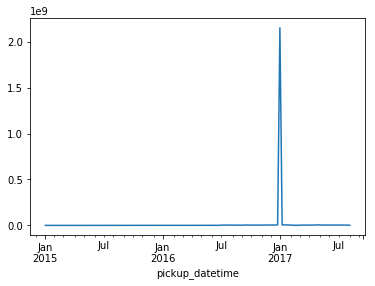

In [19]:
quito['dist_meters'].resample('W').sum().plot();

# Which months the trips lasted longer?

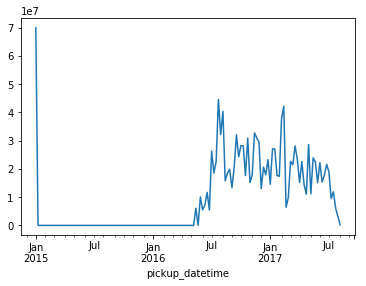

In [20]:
quito['trip_duration'].resample('W').sum().plot();

In [21]:
quito.head()

vendor_id    dropoff_datetime  pickup_longitude  \
pickup_datetime                                                       
2016-09-17 09:32:06     Quito 2016-09-17 10:05:51        -78.503922   
2016-09-18 04:03:20     Quito 2016-09-18 04:26:30        -78.440306   
2016-09-16 06:29:36     Quito 2016-09-18 06:41:33        -78.469551   
2016-09-18 05:57:47     Quito 2016-09-18 06:30:00        -78.558076   
2016-09-18 07:58:42     Quito 2016-09-18 08:14:29        -78.521818   

                     pickup_latitude  dropoff_longitude  dropoff_latitude  \
pickup_datetime                                                             
2016-09-17 09:32:06        -0.232824         -78.549447         -0.361363   
2016-09-18 04:03:20         0.006789         -78.490786         -0.104836   
2016-09-16 06:29:36        -0.143636         -78.470277         -0.131083   
2016-09-18 05:57:47        -0.278241         -78.430220         -0.201934   
2016-09-18 07:58:42        -0.208480         -78.504558         -0.222462   

                     trip_duration  dist_meters  wait_sec       Day  Year  \
pickup_datetime                                                             
2016-09-17 09:32:06           2025        24228       346  Saturday  2016   
2016-09-18 04:03:20           1390        16680       456    Sunday  2016   
2016-09-16 06:29:36         130317         1987       290    Friday  2016   
2016-09-18 05:57:47           1933        25146       302    Sunday  2016   
2016-09-18 07:58:42            948         4625       314    Sunday  2016   

                     Month  pickup_region  dropoff_region  
pickup_datetime                                            
2016-09-17 09:32:06      9              1              17  
2016-09-18 04:03:20      9             17               0  
2016-09-16 06:29:36      9              6               0  
2016-09-18 05:57:47      9              8               5  
2016-09-18 07:58:42      9             15               3

In [22]:
from sklearn import datasets, linear_model

In [23]:
quito_train = quito[0:90]
quito_test = quito[91:100]

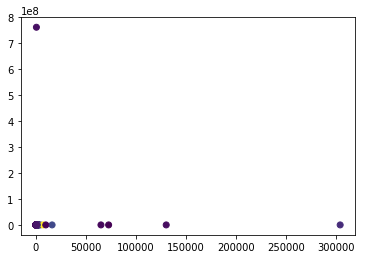

In [24]:
# basic linear regression
model = linear_model.LinearRegression()
x_vars1 = ["trip_duration", "dist_meters"]
model.fit(quito_train[x_vars1], quito_train["wait_sec"])
model.coef_, model.intercept_

x = np.linspace(25,50,100)

plt.scatter(quito_train['trip_duration'], quito_train['wait_sec'], c=quito_train["dist_meters"])
plt.plot(x, x * model.coef_[0] + model.coef_[1] + model.intercept_)
plt.plot(x, x * model.coef_[0] + model.intercept_)
plt.show()

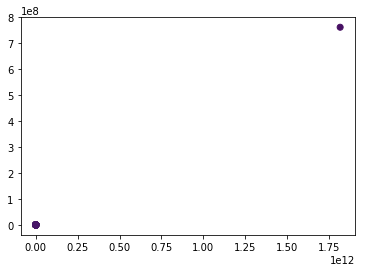

In [25]:
# with interaction term
quito["trip_duration"] = quito["dist_meters"] * quito["wait_sec"]
quito_train = quito[0:90]
quito_test = quito[91:100]

model2 = linear_model.LinearRegression()
x_vars2 = ["trip_duration", "dist_meters", "wait_sec"]
model2.fit(quito_train[x_vars2], quito_train["wait_sec"])
model2.coef_, model.intercept_

x = np.linspace(25,50,100)

plt.scatter(quito_train['trip_duration'], quito_train['wait_sec'], c=quito_train["dist_meters"])
plt.plot(x, x * (model2.coef_[0] + model2.coef_[1]) + model2.coef_[2] + model2.intercept_)
plt.plot(x, x * model2.coef_[0] + model2.intercept_)
plt.show()